In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

# Exploring data

First, I loaded the raw data to gain some information about this dataset.

In [71]:
df = pd.read_csv('raw/dataset_2.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [73]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [74]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Cleaning up the data

In the first part, it can be seen that there are many categorical features. Of my 2 algorithms, the logistic regression cannot directly handle this kind of feature. While the decision tree in theory can handle categorical features, in practice feature encoding is still required (at least that holds for Sklearn's Decision Tree model). Normally in this case, these features will be converted to numerical features (*Feature Encoding*), but for the sake of simplicity, I would only pick 2 features, which are **tenure** and **MonthlyCharges**.

In [75]:
X = df[['tenure','MonthlyCharges']].copy()
y = df['Churn'].copy()

In [76]:
X.head(10)

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
5,8,99.65
6,22,89.10
7,10,29.75
8,28,104.80
9,62,56.15


# Data visualization

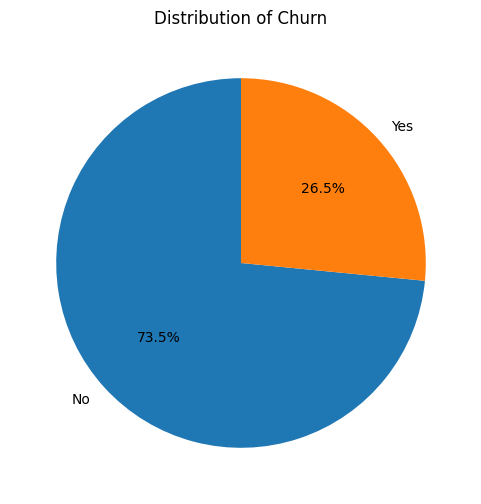

In [77]:
# Calculate the distribution of churn
churn_distribution = df['Churn'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_distribution, labels=churn_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Churn')
plt.show()

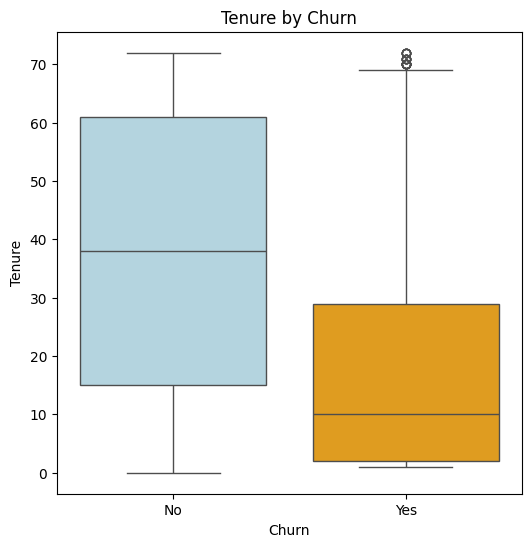

In [78]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette={'No': 'lightblue', 'Yes': 'orange'})
plt.title('Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

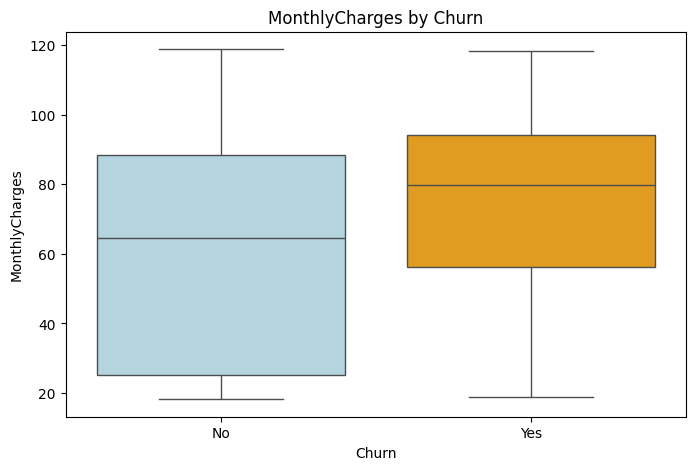

In [79]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette={'No': 'lightblue', 'Yes': 'orange'})
plt.title('MonthlyCharges by Churn')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.show()

From the data visualization part, it can be seen that there is a huge imbalance in the target classes, which may affect the prediction of the model.

# Standardization

In this step, I aimed to normalize the dataset.

In [80]:
scalar = preprocessing.StandardScaler()

In [81]:
X = scalar.fit_transform(X)
X

array([[-1.27744458, -1.16032292],
       [ 0.06632742, -0.25962894],
       [-1.23672422, -0.36266036],
       ...,
       [-0.87024095, -1.1686319 ],
       [-1.15528349,  0.32033821],
       [ 1.36937906,  1.35896134]])

# Encoding

After that, I encoded the labels to turn them into numerical feature, so that the algorithm can work fine. Then, I concatenated the label column and the feature columns to get a fully processed dataset.

In [82]:
label_encoding = preprocessing.LabelEncoder()
y = label_encoding.fit_transform(y)

df_X = pd.DataFrame(X, columns=['tenure', 'MonthlyCharges'])
df_y = pd.DataFrame(y, columns=['class'])
df = pd.concat([df_X, df_y], axis=1)
df.head(10)

,tenure,MonthlyCharges,class
0,-1.277445,-1.160323,0
1,0.066327,-0.259629,0
2,-1.236724,-0.362660,1
3,0.514251,-0.746535,0
4,-1.236724,0.197365,1
5,-0.992402,1.159546,1
6,-0.422317,0.808907,0
7,-0.910961,-1.163647,0
8,-0.177995,1.330711,1
9,1.206498,-0.286218,0


# Extract data

In the final step, I exported the dataset and save it in a folder. It would be used for testing the algorithms.

In [83]:
df.to_csv('processed/dataset_2.csv', index=False)